<a href="https://colab.research.google.com/github/SHANJAY975/CODSOFT/blob/main/Iris_flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification

# Importing the Libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Importing the Dataset

In [33]:
dataset = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv")

In [34]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploring the Dataset

In [11]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
dataset.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

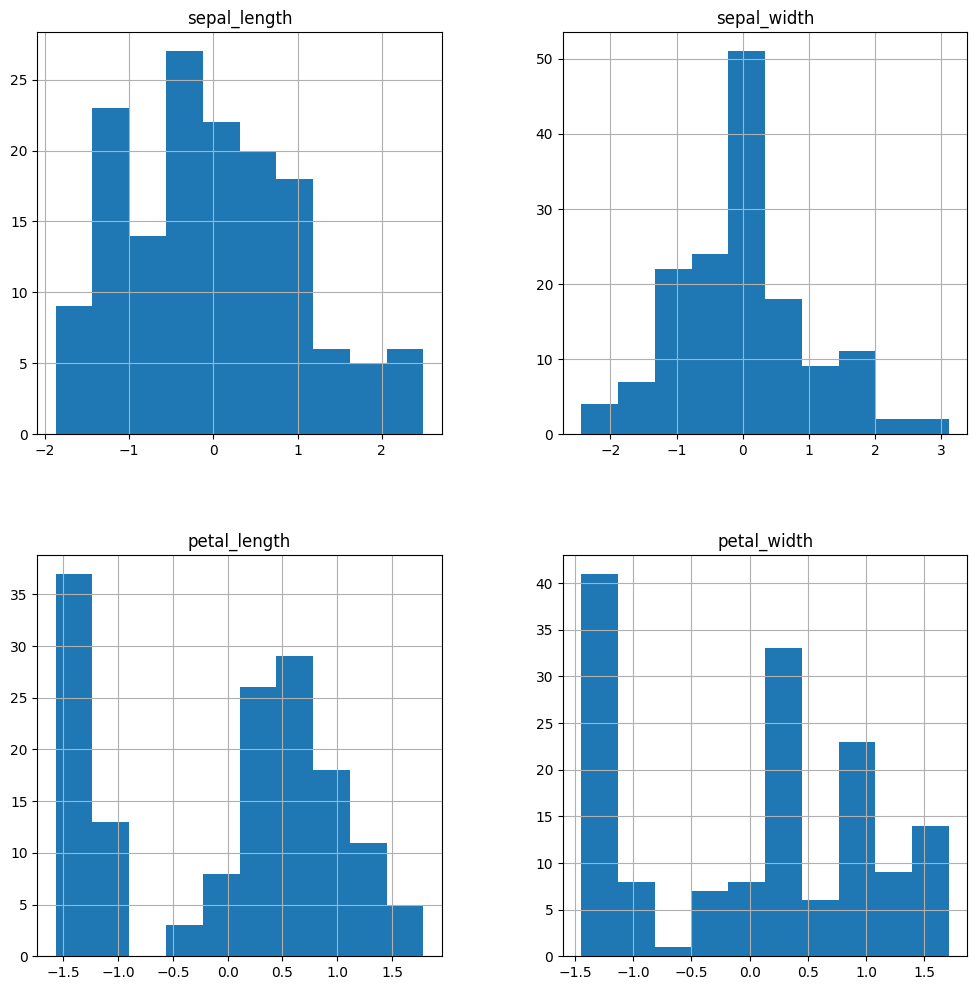

In [39]:
dataset.hist(figsize=(12, 12))

# Data Preprocessing

Normalizing the Data

In [31]:
def normalizer(X):
  SC = StandardScaler()
  X = SC.fit_transform(X)
  return X

In [36]:
for i in range(len(dataset.columns)-1):
  dataset.iloc[:,i]= normalizer(dataset.iloc[:,i].values.reshape(-1,1))

In [41]:
label_encoder = LabelEncoder()
dataset['species'] = label_encoder.fit_transform(dataset['species'])

In [42]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


# Training and Evaluation

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset.iloc[:,:-1],dataset.iloc[:,-1], test_size=0.2)

In [44]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
119,0.189830,-1.976181,0.705893,0.396172
60,-1.021849,-2.438987,-0.147093,-0.261193
4,-1.021849,1.263460,-1.341272,-1.312977
52,1.280340,0.106445,0.649027,0.396172
47,-1.506521,0.337848,-1.341272,-1.312977
...,...,...,...,...
35,-1.021849,0.337848,-1.455004,-1.312977
134,0.310998,-1.050569,1.047087,0.264699
118,2.249683,-1.050569,1.786341,1.447956
71,0.310998,-0.587764,0.137236,0.133226


In [45]:
Y_train

119    2
60     1
4      0
52     1
47     0
      ..
35     0
134    2
118    2
71     1
43     0
Name: species, Length: 120, dtype: int64

SVM

In [46]:
model2 = SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_


best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, Y_test)


print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
print("Accuracy on Testing Data:", accuracy)

Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Best Score: 0.9916666666666668
Accuracy on Testing Data: 0.9333333333333333


Random Forest

In [55]:
model3 = RandomForestClassifier()

param_grid1 = {'n_estimators': [1,2,3,4,5,6,7,8,9,10], 'max_depth': [None,1,2,3,4,5,6,7,8,9,10]}

grid_search1 = GridSearchCV(estimator=model3, param_grid=param_grid1, cv=5)
grid_search1.fit(X_train, Y_train)

best_params1 = grid_search1.best_params_
best_score1 = grid_search1.best_score_


best_model1 = grid_search1.best_estimator_
accuracy1 = best_model1.score(X_test, Y_test)

print("Model 3 - Best Hyperparameters:", best_params1)
print("Model 3 - Best Score:", best_score1)
print("Model 3 - Accuracy on Testing Data:", accuracy1)

Model 3 - Best Hyperparameters: {'max_depth': 5, 'n_estimators': 3}
Model 3 - Best Score: 0.975
Model 3 - Accuracy on Testing Data: 0.9666666666666667
